In [3]:
#importing all the required python libraries 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
# from shapely.geometry import Point
# import folium
# from folium.plugins import MarkerCluster
# from folium.plugins import FastMarkerCluster


###### Importing the Airlines performance data for the month before the onset of COVID i.e. Feb20

In [6]:
States= gpd.read_file('../data/US_States.geojson')

In [7]:
States.head()

,name,country,ISO3166-1-Alpha-3,state_code,id,geometry
0,Minnesota,United States of America,USA,MN,USA-3514,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,United States of America,USA,MT,USA-3515,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,United States of America,USA,ND,USA-3516,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Hawaii,United States of America,USA,HI,USA-3517,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Idaho,United States of America,USA,ID,USA-3518,"POLYGON ((-111.04973 44.48816, -111.05024 42.0..."


###### The following code will make all the out put dataframes be in a table format 

In [1]:

%%HTML
<style type ="text/css">
table.dataframe td, table.dataframe th {
    border: 1px black solid  !important;
 color: black !important;
}

In [8]:
Airports=pd.read_csv('../data/US_Airports.csv')

In [44]:
Airports.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [10]:
Airports.shape

(3376, 7)

<AxesSubplot:>

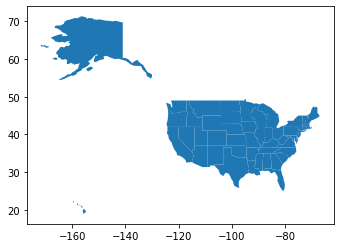

In [11]:
States.plot()

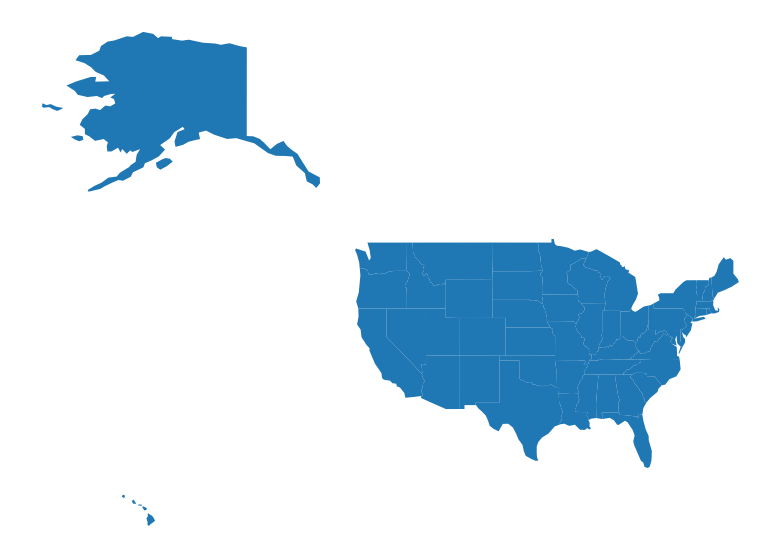

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
States.plot(ax = ax)
ax.axis('off');

###### Reading all the three monthly flight performnce sample datasets ( Feb20,Aug20,Feb21) 

In [85]:
OTPFeb20 =pd.read_csv('../data/Airlines OTP February20.csv',low_memory=False)
OTPAug20 =pd.read_csv('../data/Airlines OTP August20.csv',low_memory=False)
OTPFeb21 = pd.read_csv('../data/Airlines OTP February21.csv',low_memory=False)

In [91]:
# OTPFeb20.head()
# OTPAug20.head()
OTPFeb21.head()

,Year,QUARTER,Month,DayofMonth,DayOfWeek,FlightDate,MKT_UNIQUE_CARRIER,BRANDED_CODE_SHARE,DOT_ID_Marketing_Airline,Marketing_Id,Flight_Number_Marketing_Airline,SCH_OP_UNIQUE_CARRIER,SCH_OP_CARRIER_AIRLINE_ID,SCH_OP_CARRIER,SCH_OP_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,IATA_Code_Marketing_Airline,TAIL_NUM,Flight_Number_Operating_Airline,OriginAirportID,ORIGIN_AIRPORT_SEQ_ID,OriginCityMarketID,Origin,...,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 119,Duplicate
0,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,1432,NaN,NaN,NaN,NaN,DL,19790,DL,N363NW,1432,14893,1489302,33192,SMF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,1434,NaN,NaN,NaN,NaN,DL,19790,DL,N349NW,1434,10397,1039707,30397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,1434,NaN,NaN,NaN,NaN,DL,19790,DL,N349NW,1434,11042,1104205,30647,CLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,1435,NaN,NaN,NaN,NaN,DL,19790,DL,N964AT,1435,10397,1039707,30397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,1435,NaN,NaN,NaN,NaN,DL,19790,DL,N964AT,1435,11057,1105703,31057,CLT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
OTPFeb20.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       ...
       'Div4TailNum', 'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID',
       'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff',
       'Div5TailNum', 'Duplicate'],
      dtype='object', length=119)

In [17]:
OTPFeb20.shape

(623103, 119)

In [117]:
OTPFeb21.describe()

,Year,QUARTER,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,SCH_OP_CARRIER_AIRLINE_ID,SCH_OP_CARRIER_FL_NUM,OP_CARRIER_AIRLINE_ID,Flight_Number_Operating_Airline,OriginAirportID,ORIGIN_AIRPORT_SEQ_ID,OriginCityMarketID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DestAirportID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRSDepTime,DepTime,DepDelay,...,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 119,Duplicate
count,350170.0,350170.0,350170.0,350170.000000,350170.000000,350170.000000,350170.000000,18.000000,18.000000,350170.000000,350170.000000,350170.000000,3.501700e+05,350170.000000,350170.000000,350170.000000,350170.000000,3.501700e+05,350170.000000,350170.000000,350170.000000,350170.000000,330183.000000,330167.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2021.0,1.0,2.0,14.773559,4.050427,19838.189551,2886.903450,20399.611111,5493.055556,20035.269195,2886.903450,12647.718200,1.264776e+06,31749.343465,27.188728,56.154722,12647.592492,1.264763e+06,31749.334746,27.189202,56.153077,1301.798549,1303.495053,5.391787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,8.046534,2.012131,258.894117,1827.881569,16.313614,311.632225,372.083254,1827.881569,1548.247214,1.548244e+05,1368.797520,16.992094,25.842310,1548.252299,1.548249e+05,1368.770416,16.992049,25.842352,444.056309,450.800435,48.707188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2021.0,1.0,2.0,1.000000,1.000000,19393.000000,1.000000,20378.000000,4970.000000,19393.000000,1.000000,10135.000000,1.013506e+06,30070.000000,1.000000,1.000000,10135.000000,1.013506e+06,30070.000000,1.000000,1.000000,5.000000,1.000000,-59.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2021.0,1.0,2.0,8.000000,2.000000,19790.000000,1261.000000,20397.000000,5223.750000,19790.000000,1261.000000,11292.000000,1.129202e+06,30559.000000,12.000000,34.000000,11292.000000,1.129202e+06,30559.000000,12.000000,34.000000,926.000000,928.000000,-7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021.0,1.0,2.0,15.000000,4.000000,19805.000000,2634.000000,20397.000000,5618.000000,19977.000000,2634.000000,12478.000000,1.247805e+06,31453.000000,26.000000,53.000000,12478.000000,1.247805e+06,31453.000000,26.000000,53.000000,1300.000000,1306.000000,-4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021.0,1.0,2.0,22.000000,6.000000,19977.000000,4641.000000,20397.000000,5620.000000,20397.000000,4641.000000,14057.000000,1.405702e+06,32575.000000,45.000000,82.000000,14057.000000,1.405702e+06,32575.000000,45.000000,82.000000,1646.000000,1651.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2021.0,1.0,2.0,28.000000,7.000000,20436.000000,9658.000000,20452.000000,6145.000000,20500.000000,9658.000000,16869.000000,1.686901e+06,36101.000000,78.000000,93.000000,16869.000000,1.686901e+06,36101.000000,78.000000,93.000000,2359.000000,2400.000000,2791.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Removing all the unnecessary columns from OTPFeb20 Data frame and Keep the data frame one the remaining columns 

In [153]:

# OTPFeb20 = OTPFeb20.loc[['Year','Month','DayofMonth','DayOfWeek','FlightDate','DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline',
# 'Flight_Number_Marketing_Airline','Operating_Airline','Flight_Number_Operating_Airline','OriginAirportID','OriginCityMarketID','Origin',
# 'OriginCityName','OriginState','OriginStateName','DestAirportID','Dest','DestCityName','DestState','DestStateName','CRSDepTime',
# 'DepTime','DepDelay','DepDelayMinutes','TaxiOut','WheelsOff','WheelsOn','TaxiIn','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes',
# 'Cancelled','Diverted','CRSElapsedTime','ActualElapsedTime','AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',
# 'TotalAddGTime','DivAirportLandings','Duplicate']]

column ={'Year','Month','DayofMonth','DayOfWeek','FlightDate','DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline',
'Flight_Number_Marketing_Airline','Flight_Number_Operating_Airline','OriginAirportID','OriginCityMarketID','Origin',
'OriginCityName','OriginState','OriginStateName','DestAirportID','Dest','DestCityName','DestState','DestStateName','CRSDepTime',
'DepTime','DepDelay','DepDelayMinutes','TaxiOut','WheelsOff','WheelsOn','TaxiIn','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes',
'Cancelled','Diverted','CRSElapsedTime','ActualElapsedTime','AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',
'TotalAddGTime','DivAirportLandings','Duplicate'}
pd.set_option('display.max_columns', 48)
#Restricting the dataframes on the above mentioned columns only 
# OTPFeb20_Clean=OTPFeb20[column]
# OTPAug20_Clean=OTPAug20[column]
OTPFeb21_Clean=OTPFeb21[column]



In [200]:
#Expaling the info using the color and/or formating style in the out put, to do that the follwing class defintion is used 

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Fep20 Performance data looks like below !'+color.END)
display(OTPFeb20_Clean.head())
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Aug20 Performance data looks like below !'+color.END)
display(OTPAug20_Clean.head())
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Fep21 Performance data looks like below !'+color.END)
display(OTPFeb21_Clean.head())




Fep20 Performance data looks like below !


,IATA_Code_Marketing_Airline,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,DestCityName,DepDelay,DOT_ID_Marketing_Airline,OriginCityName,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay,Dep_Delay15,Arr_Delay15
0,AA,13139,61.0,1430.0,1450.0,0.0,3300,20.0,LYH,2,-8.0,NaN,Virginia,North Carolina,0,2/1/2020,NC,1539,36.0,0,2020,1526.0,31057,NaN,"Lynchburg, VA",-4.0,19805,"Charlotte, NC",65,1531.0,N,0.0,1,VA,11057,3300,5.0,1434,NaN,NaN,NaN,6,CLT,0,NaN,0,0
1,AA,13139,66.0,1442.0,1459.0,8.0,3300,17.0,LYH,2,9.0,NaN,Virginia,North Carolina,0,2/8/2020,NC,1539,40.0,0,2020,1539.0,31057,NaN,"Lynchburg, VA",8.0,19805,"Charlotte, NC",65,1548.0,N,9.0,8,VA,11057,3300,9.0,1434,NaN,NaN,NaN,6,CLT,0,NaN,0,0
2,AA,14814,69.0,2247.0,2315.0,12.0,3300,28.0,SHV,2,18.0,NaN,Louisiana,Texas,0,2/13/2020,TX,2338,39.0,0,2020,2354.0,30194,0.0,"Shreveport, LA",12.0,19805,"Dallas/Fort Worth, TX",63,2356.0,N,18.0,13,LA,11298,3300,2.0,2235,6.0,12.0,0.0,4,DFW,0,0.0,1,1
3,AA,14814,51.0,2230.0,2245.0,0.0,3300,15.0,SHV,2,-17.0,NaN,Louisiana,Texas,0,2/14/2020,TX,2338,32.0,0,2020,2317.0,30194,NaN,"Shreveport, LA",-5.0,19805,"Dallas/Fort Worth, TX",63,2321.0,N,0.0,14,LA,11298,3300,4.0,2235,NaN,NaN,NaN,5,DFW,0,NaN,0,0
4,AA,14814,62.0,2246.0,2312.0,11.0,3300,26.0,SHV,2,10.0,NaN,Louisiana,Texas,0,2/15/2020,TX,2338,31.0,0,2020,2343.0,30194,NaN,"Shreveport, LA",11.0,19805,"Dallas/Fort Worth, TX",63,2348.0,N,10.0,15,LA,11298,3300,5.0,2235,NaN,NaN,NaN,6,DFW,0,NaN,0,0




Aug20 Performance data looks like below !


,IATA_Code_Marketing_Airline,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,DestCityName,DepDelay,DOT_ID_Marketing_Airline,OriginCityName,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay,Dep_Delay15,Arr_Delay15
0,WN,10821,195.0,1542.0,1551.0,0.0,1443,9.0,BWI,8,-8.0,NaN,Maryland,Colorado,0.0,8/24/2020,CO,2105,183.0,0,2020,2054.0,30325,NaN,"Baltimore, MD",-3.0,19393,"Denver, CO",200.0,2057.0,NaN,0.0,24,MD,11292,1443,3.0,1545,NaN,NaN,NaN,1,DEN,0,NaN,0,0
1,WN,11042,162.0,1950.0,2003.0,0.0,443,13.0,CLE,8,-8.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,40,144.0,0,2020,27.0,30325,NaN,"Cleveland, OH",-5.0,19393,"Denver, CO",165.0,32.0,NaN,0.0,24,OH,11292,443,5.0,1955,NaN,NaN,NaN,1,DEN,0,NaN,0,0
2,WN,11042,167.0,1332.0,1343.0,0.0,1572,11.0,CLE,8,-1.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,1820,151.0,0,2020,1814.0,30325,NaN,"Cleveland, OH",-3.0,19393,"Denver, CO",165.0,1819.0,NaN,0.0,24,OH,11292,1572,5.0,1335,NaN,NaN,NaN,1,DEN,0,NaN,0,0
3,WN,11066,159.0,1408.0,1418.0,0.0,204,10.0,CMH,8,-8.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,1855,147.0,0,2020,1845.0,30325,NaN,"Columbus, OH",-7.0,19393,"Denver, CO",160.0,1847.0,NaN,0.0,24,OH,11292,204,2.0,1415,NaN,NaN,NaN,1,DEN,0,NaN,0,0
4,WN,11066,161.0,1944.0,1957.0,0.0,1642,13.0,CMH,8,5.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,20,143.0,0,2020,20.0,30325,NaN,"Columbus, OH",-1.0,19393,"Denver, CO",155.0,25.0,NaN,5.0,24,OH,11292,1642,5.0,1945,NaN,NaN,NaN,1,DEN,0,NaN,0,0




Fep21 Performance data looks like below !


,IATA_Code_Marketing_Airline,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,DestCityName,DepDelay,DOT_ID_Marketing_Airline,OriginCityName,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay,Dep_Delay15,Arr_Delay15
0,DL,14869,96.0,1338.0,1350.0,0.0,1432,12.0,SLC,2,-5.0,NaN,Utah,California,0,2/21/2021,CA,1619,80.0,0,2021,1610.0,33192,NaN,"Salt Lake City, UT",-7.0,19790,"Sacramento, CA",94,1614.0,NaN,0.0,21,UT,14893,1432,4.0,1345,NaN,NaN,NaN,7,SMF,0,NaN,0,0
1,DL,11042,88.0,1448.0,1458.0,147.0,1434,10.0,CLE,2,135.0,NaN,Ohio,Georgia,0,2/21/2021,GA,1401,73.0,0,2021,1611.0,30397,0.0,"Cleveland, OH",147.0,19790,"Atlanta, GA",100,1616.0,NaN,135.0,21,OH,10397,1434,5.0,1221,0.0,0.0,0.0,7,ATL,0,135.0,1,1
2,DL,10397,133.0,1711.0,1751.0,115.0,1434,40.0,ATL,2,139.0,NaN,Georgia,Ohio,0,2/21/2021,OH,1705,86.0,0,2021,1917.0,30647,0.0,"Atlanta, GA",115.0,19790,"Cleveland, OH",109,1924.0,NaN,139.0,21,GA,11042,1434,7.0,1516,24.0,105.0,0.0,7,CLE,0,10.0,1,1
3,DL,11057,58.0,1635.0,1647.0,0.0,1435,12.0,CLT,2,-21.0,NaN,North Carolina,Georgia,0,2/21/2021,GA,1754,40.0,0,2021,1727.0,30397,NaN,"Charlotte, NC",-5.0,19790,"Atlanta, GA",74,1733.0,NaN,0.0,21,NC,10397,1435,6.0,1640,NaN,NaN,NaN,7,ATL,0,NaN,0,0
4,DL,10397,77.0,1853.0,1921.0,0.0,1435,28.0,ATL,2,-10.0,NaN,Georgia,North Carolina,0,2/21/2021,NC,2020,43.0,0,2021,2004.0,31057,NaN,"Atlanta, GA",-6.0,19790,"Charlotte, NC",81,2010.0,NaN,0.0,21,GA,11057,1435,6.0,1859,NaN,NaN,NaN,7,CLT,0,NaN,0,0


###### Including two calculated boolean fields into the data Frame , to calculate Departure and Arrival Delays  

In [156]:
# As an the best aviation practice a flights falls in irregualrity or major delay iff it delays for 15' or more 
# Hence here, the two calculated fields added to check weather a flight leg is delayed for 15'm or nor and assigigning a (1,0)<->(True,False)
# Numeric or boolean values .
#OTPFeb20_Clean['Dep_Delay15'] = OTPFeb20_Clean.loc[(OTPFeb20_Clean['DepDelayMinutes']>=15,1,0)]
OTPFeb20_Clean['Dep_Delay15'] = np.where(OTPFeb20_Clean['ArrDelayMinutes']>=15,1,0)
OTPFeb20_Clean['Arr_Delay15'] = np.where(OTPFeb20_Clean['ArrDelayMinutes']>=15,1,0)
OTPAug20_Clean['Dep_Delay15'] = np.where(OTPAug20_Clean['DepDelayMinutes']>=15,1,0)
OTPAug20_Clean['Arr_Delay15'] = np.where(OTPAug20_Clean['ArrDelayMinutes']>=15,1,0)
OTPFeb21_Clean['Dep_Delay15'] = np.where(OTPFeb21_Clean['DepDelayMinutes']>=15,1,0)
OTPFeb21_Clean['Arr_Delay15'] = np.where(OTPFeb21_Clean['ArrDelayMinutes']>=15,1,0)

<ipython-input-156-f8b039d3ba4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OTPFeb20_Clean['Dep_Delay15'] = np.where(OTPFeb20_Clean['ArrDelayMinutes']>=15,1,0)
<ipython-input-156-f8b039d3ba4e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OTPFeb20_Clean['Arr_Delay15'] = np.where(OTPFeb20_Clean['ArrDelayMinutes']>=15,1,0)
<ipython-input-156-f8b039d3ba4e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
#To capitallize the column names on the Aug20 and Feb21 dataframes the following code was utilized .
#OTPAug20.columns = [str(x).capitalize() for x in OTPAug20.columns]

###### Looking into the cleansed data frames with the checking of the departure and arrival delay value greater or equal to 15'

In [157]:
#Looking into the cleansed data frames with the checking of the departure and arrival delay value greater or equal to 15'
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BOLD = '\033[1m'
   END ='\033[0m'
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Fep20 Performance data looks like below !'+color.END)
display(OTPFeb20_Clean.head())
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Aug20 Performance data looks like below !'+color.END)
display(OTPAug20_Clean.head())
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Fep21 Performance data looks like below !'+color.END)
display(OTPFeb21_Clean.head())




Fep20 Performance data looks like below !


,IATA_Code_Marketing_Airline,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,DestCityName,DepDelay,DOT_ID_Marketing_Airline,OriginCityName,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay,Dep_Delay15,Arr_Delay15
0,AA,13139,61.0,1430.0,1450.0,0.0,3300,20.0,LYH,2,-8.0,NaN,Virginia,North Carolina,0,2/1/2020,NC,1539,36.0,0,2020,1526.0,31057,NaN,"Lynchburg, VA",-4.0,19805,"Charlotte, NC",65,1531.0,N,0.0,1,VA,11057,3300,5.0,1434,NaN,NaN,NaN,6,CLT,0,NaN,0,0
1,AA,13139,66.0,1442.0,1459.0,8.0,3300,17.0,LYH,2,9.0,NaN,Virginia,North Carolina,0,2/8/2020,NC,1539,40.0,0,2020,1539.0,31057,NaN,"Lynchburg, VA",8.0,19805,"Charlotte, NC",65,1548.0,N,9.0,8,VA,11057,3300,9.0,1434,NaN,NaN,NaN,6,CLT,0,NaN,0,0
2,AA,14814,69.0,2247.0,2315.0,12.0,3300,28.0,SHV,2,18.0,NaN,Louisiana,Texas,0,2/13/2020,TX,2338,39.0,0,2020,2354.0,30194,0.0,"Shreveport, LA",12.0,19805,"Dallas/Fort Worth, TX",63,2356.0,N,18.0,13,LA,11298,3300,2.0,2235,6.0,12.0,0.0,4,DFW,0,0.0,1,1
3,AA,14814,51.0,2230.0,2245.0,0.0,3300,15.0,SHV,2,-17.0,NaN,Louisiana,Texas,0,2/14/2020,TX,2338,32.0,0,2020,2317.0,30194,NaN,"Shreveport, LA",-5.0,19805,"Dallas/Fort Worth, TX",63,2321.0,N,0.0,14,LA,11298,3300,4.0,2235,NaN,NaN,NaN,5,DFW,0,NaN,0,0
4,AA,14814,62.0,2246.0,2312.0,11.0,3300,26.0,SHV,2,10.0,NaN,Louisiana,Texas,0,2/15/2020,TX,2338,31.0,0,2020,2343.0,30194,NaN,"Shreveport, LA",11.0,19805,"Dallas/Fort Worth, TX",63,2348.0,N,10.0,15,LA,11298,3300,5.0,2235,NaN,NaN,NaN,6,DFW,0,NaN,0,0




Aug20 Performance data looks like below !


,IATA_Code_Marketing_Airline,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,DestCityName,DepDelay,DOT_ID_Marketing_Airline,OriginCityName,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay,Dep_Delay15,Arr_Delay15
0,WN,10821,195.0,1542.0,1551.0,0.0,1443,9.0,BWI,8,-8.0,NaN,Maryland,Colorado,0.0,8/24/2020,CO,2105,183.0,0,2020,2054.0,30325,NaN,"Baltimore, MD",-3.0,19393,"Denver, CO",200.0,2057.0,NaN,0.0,24,MD,11292,1443,3.0,1545,NaN,NaN,NaN,1,DEN,0,NaN,0,0
1,WN,11042,162.0,1950.0,2003.0,0.0,443,13.0,CLE,8,-8.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,40,144.0,0,2020,27.0,30325,NaN,"Cleveland, OH",-5.0,19393,"Denver, CO",165.0,32.0,NaN,0.0,24,OH,11292,443,5.0,1955,NaN,NaN,NaN,1,DEN,0,NaN,0,0
2,WN,11042,167.0,1332.0,1343.0,0.0,1572,11.0,CLE,8,-1.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,1820,151.0,0,2020,1814.0,30325,NaN,"Cleveland, OH",-3.0,19393,"Denver, CO",165.0,1819.0,NaN,0.0,24,OH,11292,1572,5.0,1335,NaN,NaN,NaN,1,DEN,0,NaN,0,0
3,WN,11066,159.0,1408.0,1418.0,0.0,204,10.0,CMH,8,-8.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,1855,147.0,0,2020,1845.0,30325,NaN,"Columbus, OH",-7.0,19393,"Denver, CO",160.0,1847.0,NaN,0.0,24,OH,11292,204,2.0,1415,NaN,NaN,NaN,1,DEN,0,NaN,0,0
4,WN,11066,161.0,1944.0,1957.0,0.0,1642,13.0,CMH,8,5.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,20,143.0,0,2020,20.0,30325,NaN,"Columbus, OH",-1.0,19393,"Denver, CO",155.0,25.0,NaN,5.0,24,OH,11292,1642,5.0,1945,NaN,NaN,NaN,1,DEN,0,NaN,0,0




Fep21 Performance data looks like below !


,IATA_Code_Marketing_Airline,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,DestCityName,DepDelay,DOT_ID_Marketing_Airline,OriginCityName,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay,Dep_Delay15,Arr_Delay15
0,DL,14869,96.0,1338.0,1350.0,0.0,1432,12.0,SLC,2,-5.0,NaN,Utah,California,0,2/21/2021,CA,1619,80.0,0,2021,1610.0,33192,NaN,"Salt Lake City, UT",-7.0,19790,"Sacramento, CA",94,1614.0,NaN,0.0,21,UT,14893,1432,4.0,1345,NaN,NaN,NaN,7,SMF,0,NaN,0,0
1,DL,11042,88.0,1448.0,1458.0,147.0,1434,10.0,CLE,2,135.0,NaN,Ohio,Georgia,0,2/21/2021,GA,1401,73.0,0,2021,1611.0,30397,0.0,"Cleveland, OH",147.0,19790,"Atlanta, GA",100,1616.0,NaN,135.0,21,OH,10397,1434,5.0,1221,0.0,0.0,0.0,7,ATL,0,135.0,1,1
2,DL,10397,133.0,1711.0,1751.0,115.0,1434,40.0,ATL,2,139.0,NaN,Georgia,Ohio,0,2/21/2021,OH,1705,86.0,0,2021,1917.0,30647,0.0,"Atlanta, GA",115.0,19790,"Cleveland, OH",109,1924.0,NaN,139.0,21,GA,11042,1434,7.0,1516,24.0,105.0,0.0,7,CLE,0,10.0,1,1
3,DL,11057,58.0,1635.0,1647.0,0.0,1435,12.0,CLT,2,-21.0,NaN,North Carolina,Georgia,0,2/21/2021,GA,1754,40.0,0,2021,1727.0,30397,NaN,"Charlotte, NC",-5.0,19790,"Atlanta, GA",74,1733.0,NaN,0.0,21,NC,10397,1435,6.0,1640,NaN,NaN,NaN,7,ATL,0,NaN,0,0
4,DL,10397,77.0,1853.0,1921.0,0.0,1435,28.0,ATL,2,-10.0,NaN,Georgia,North Carolina,0,2/21/2021,NC,2020,43.0,0,2021,2004.0,31057,NaN,"Atlanta, GA",-6.0,19790,"Charlotte, NC",81,2010.0,NaN,0.0,21,GA,11057,1435,6.0,1859,NaN,NaN,NaN,7,CLT,0,NaN,0,0


In [158]:
display(OTPFeb20_Clean.shape)
display(OTPAug20_Clean.shape)
display(OTPFeb21_Clean.shape)


(623103, 47)

(398470, 47)

(350170, 47)

###### Calculating the number of Departure and Arrival flight delays (more than 15') ,grouped by Airport for each dataset  

In [181]:
#By_Origin_airport_Feb20 = OTPFeb20_Clean.groupby('Origin')
Num_depdly_ATapt_Feb20 =OTPFeb20_Clean.groupby('Origin')\
                        ['Dep_Delay15'].sum()
Num_arrdly_ATapt_Feb20 =OTPFeb20_Clean.groupby('Origin')\
                        ['Arr_Delay15'].sum()
Num_depdly_ATapt_Aug20 =OTPAug20_Clean.groupby('Origin')\
                        ['Dep_Delay15'].sum()
Num_arrdly_ATapt_Aug20 =OTPAug20_Clean.groupby('Origin')\
                        ['Arr_Delay15'].sum()
Num_depdly_ATapt_Feb21 =OTPFeb21_Clean.groupby('Origin')\
                        ['Dep_Delay15'].sum()
Num_arrdly_ATapt_Feb21 =OTPFeb21_Clean.groupby('Origin')\
                        ['Arr_Delay15'].sum()

###### Creating A filtered dataframe based on the departure and arrival delay at airport 

In [182]:
Airport_Delay_Feb20 = pd.DataFrame([Num_depdly_ATapt_Feb20 , Num_arrdly_ATapt_Feb20 ])


In [175]:
Airport_Delay_Feb20

Origin,ABE,ABI,ABQ,ABR,ABY,ACT,ACV,ACY,ADK,ADQ,AEX,AGS,ALB,ALO,ALW,AMA,ANC,APN,ART,ASE,ATL,ATW,ATY,AUS,...,SWO,SYR,TLH,TOL,TPA,TRI,TTN,TUL,TUS,TVC,TWF,TXK,TYR,TYS,USA,VEL,VLD,VPS,WRG,XNA,XWA,YAK,YKM,YUM
Dep_Delay15,94,21,219,6,10,23,30,43,0,3,53,102,247,8,2,65,109,7,11,220,4352,86,13,545,...,6,276,97,41,939,79,57,155,200,50,10,14,24,296,29,6,15,104,12,194,19,7,20,16
Arr_Delay15,94,21,219,6,10,23,30,43,0,3,53,102,247,8,2,65,109,7,11,220,4352,86,13,545,...,6,276,97,41,939,79,57,155,200,50,10,14,24,296,29,6,15,104,12,194,19,7,20,16


In [194]:
# Transposing the 'Airport_Delay_Feb20'data frame would change the orientation as below 
Airport_Delay_Feb20 = pd.DataFrame([Num_depdly_ATapt_Feb20, Num_arrdly_ATapt_Feb20 ]).T
#pd.set_option('display.max_rows', 365)
Airport_Delay_Feb20.head()

,Dep_Delay15,Arr_Delay15
Origin,,
ABE,94,94
ABI,21,21
ABQ,219,219
ABR,6,6
ABY,10,10


In [195]:
Airport_Delay_Feb20.rename(columns={'Origin':'Airport','Dep_Delay15':'Num_depdly_ATapt_Feb20','Arr_Delay15':'Num_arrdly_ATapt_Feb20'},inplace=True)
# why i couldn't get the field name as 'Airport' for the index ?
Airport_Delay_Feb20.head()

,Num_depdly_ATapt_Feb20,Num_arrdly_ATapt_Feb20
Origin,,
ABE,94,94
ABI,21,21
ABQ,219,219
ABR,6,6
ABY,10,10


In [189]:
Airport_Delay_Feb20.columns

Index(['Num_depdly_ATapt', 'Num_arrdly_ATapt'], dtype='object')

In [197]:
Airport_Delay_Aug20 = pd.DataFrame([Num_depdly_ATapt_Aug20 , Num_arrdly_ATapt_Aug20 ]).T
Airport_Delay_Feb21 = pd.DataFrame([Num_depdly_ATapt_Feb21 , Num_arrdly_ATapt_Feb21 ]).T

Airport_Delay_Aug20.rename(columns={'Origin':'Airport','Dep_Delay15':'Num_depdly_ATapt_Aug20','Arr_Delay15':'Num_arrdly_ATapt_Aug20'},inplace=True)
Airport_Delay_Feb21.rename(columns={'Origin':'Airport','Dep_Delay15':'Num_depdly_ATapt_Feb21','Arr_Delay15':'Num_arrdly_ATapt_Feb21'},inplace=True)
Airport_Delay_Feb20['Total_delay']=Airport_Delay_Feb20['Num_depdly_ATapt_Feb20']+Airport_Delay_Feb20['Num_arrdly_ATapt_Feb20']
Airport_Delay_Aug20['Total_delay']=Airport_Delay_Aug20['Num_depdly_ATapt_Aug20']+Airport_Delay_Aug20['Num_arrdly_ATapt_Aug20']
Airport_Delay_Feb21['Total_delay']=Airport_Delay_Feb21['Num_depdly_ATapt_Feb21']+Airport_Delay_Feb21['Num_arrdly_ATapt_Feb21']

print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Feb20 Cleaned,and with aggregated Airport delay data !'+color.END)
display(Airport_Delay_Feb20.head(10))
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Aug20 Cleaned,and with aggregated Airport delay data !'+color.END)
display(Airport_Delay_Aug20.head(10))
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Feb21 Cleaned,and with aggregated Airport delay data !'+color.END)
display(Airport_Delay_Feb21.head(10))




Feb20 Cleaned,and with aggregated Airport delay data !


,Num_depdly_ATapt_Feb20,Num_arrdly_ATapt_Feb20,Total_delay
Origin,,,
ABE,94,94,188
ABI,21,21,42
ABQ,219,219,438
ABR,6,6,12
ABY,10,10,20
ACT,23,23,46
ACV,30,30,60
ACY,43,43,86
ADK,0,0,0




Aug20 Cleaned,and with aggregated Airport delay data !


,Num_depdly_ATapt_Aug20,Num_arrdly_ATapt_Aug20,Total_delay
Origin,,,
ABE,24,26,50
ABI,10,28,38
ABQ,57,63,120
ABR,6,5,11
ABY,4,3,7
ACK,10,12,22
ACT,7,15,22
ACV,10,12,22
ACY,8,10,18




Feb21 Cleaned,and with aggregated Airport delay data !


,Num_depdly_ATapt_Feb21,Num_arrdly_ATapt_Feb21,Total_delay
Origin,,,
ABE,26,49,75
ABI,17,28,45
ABQ,79,116,195
ABR,7,6,13
ABY,8,8,16
ACT,12,14,26
ACV,3,4,7
ACY,11,27,38
ADK,4,5,9


###### Sorting the Airports delay in ascending order , to see which Airports had the maximum number of , Arrival , Departure and Total delay per the months specified 

In [202]:
Airport_Delay_Feb20_sort = Airport_Delay_Feb20.sort_values(by='Total_delay', ascending=False)
Airport_Delay_Aug20_sort = Airport_Delay_Aug20.sort_values(by='Total_delay', ascending=False)
Airport_Delay_Feb21_sort = Airport_Delay_Feb21.sort_values(by='Total_delay', ascending=False)

print("\n\n"+color.BOLD +'\033[1m' + color.BLUE +'\033[94m'+ 'Feb20 Data sorted down based on Total Airport delay data!'+color.END)
display(Airport_Delay_Feb20_sort.head(10))
print("\n\n"+color.BOLD +'\033[1m' + color.BLUE +'\033[94m'+ 'Aug20 Data sorted down based on Total Airport delay data!'+color.END)
display(Airport_Delay_Aug20_sort.head(10))
print("\n\n"+color.BOLD +'\033[1m' + color.BLUE +'\033[94m'+ 'Feb21 Data sorted down based on Total Airport delay data!'+color.END)
display(Airport_Delay_Feb21_sort.head(10))

#Airport_Delay.columns = ['Airport_code','Dep_Delay15','Arr_Delay15']



Feb20 Data sorted down based on Total Airport delay data!


,Num_depdly_ATapt_Feb20,Num_arrdly_ATapt_Feb20,Total_delay
Origin,,,
ORD,5565,5565,11130
CLT,4930,4930,9860
ATL,4352,4352,8704
DEN,4290,4290,8580
DFW,3624,3624,7248
EWR,2654,2654,5308
DTW,2252,2252,4504
LGA,2243,2243,4486
MCO,2023,2023,4046




Aug20 Data sorted down based on Total Airport delay data!


,Num_depdly_ATapt_Aug20,Num_arrdly_ATapt_Aug20,Total_delay
Origin,,,
ATL,1853,2181,4034
DFW,1609,1966,3575
CLT,1513,1969,3482
DEN,1358,1341,2699
ORD,967,1141,2108
SEA,676,981,1657
DTW,709,755,1464
LAS,687,606,1293
PHL,546,674,1220




Feb21 Data sorted down based on Total Airport delay data!


,Num_depdly_ATapt_Feb21,Num_arrdly_ATapt_Feb21,Total_delay
Origin,,,
DEN,2780,2960,5740
DFW,2729,2777,5506
ORD,1936,3135,5071
ATL,1725,1824,3549
CLT,1273,1487,2760
SEA,1212,1473,2685
DTW,717,1306,2023
MCO,1063,923,1986
SLC,828,946,1774


###### Sample Plotting on the Total number of delays per Airport Feb20

<AxesSubplot:title={'center':'Number of delayed flights by Airport'}, xlabel='Origin'>

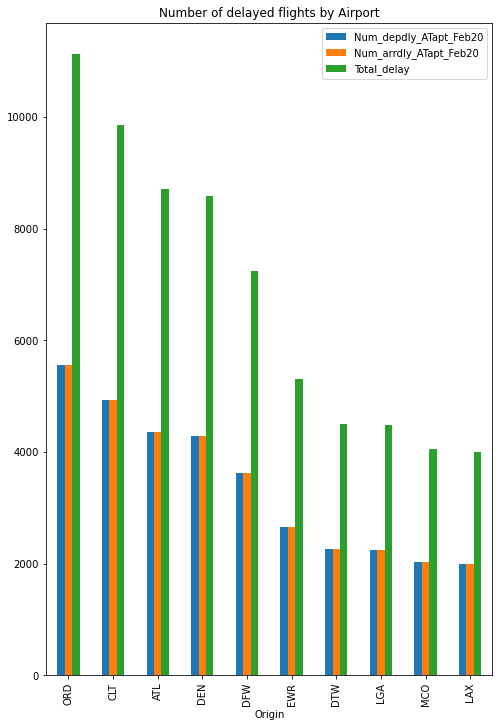

In [205]:
fig, ax = plt.subplots(figsize=(8,12))
Airport_Delay_Feb20_sort.head(10).plot.bar(title='Number of delayed flights by Airport',ax=ax)


In [140]:
#Airport_Delay['Airport_code']=Airport_Delay['index'] #= Airport_Delay.rename('index' , 'Airport Code')